In [1]:
#link https://www.kaggle.com/anezka/cnn-with-keras-for-humpback-whale-id
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow
import zipfile as zf
import os
import csv
import gc
import operator
import random
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split deprec
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from random import shuffle
from IPython.display import Image
from pathlib import Path
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.utils import np_utils
import keras.backend as K
from keras.models import Sequential
from keras import optimizers

#load the training data
trainData = pd.read_csv("C:/Users/stef/DesEnormesQueues/train.csv")

#See what is in the data
trainData.sample(5)

Using TensorFlow backend.


,Image,Id
3691,608f82a4.jpg,w_285da1a
1523,28907296.jpg,w_ffb4e3d
7286,bcdc15aa.jpg,w_b9f5b8b
2654,45328aa6.jpg,w_6193637
5747,94d60e27.jpg,w_eb9027d


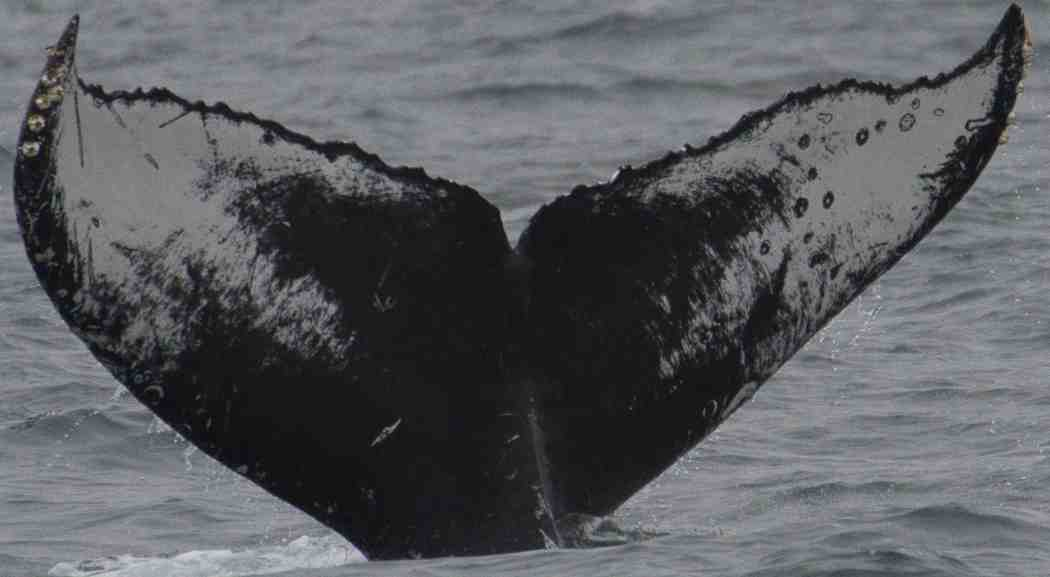

In [2]:
#show sample image
Image(filename="C:/Users/stef/DesEnormesQueues/train/"+random.choice(trainData['Image'])) 

In [3]:
def prepareImages(data, m, dataset):
    
    print("Preparing images")
    
    X_train = np.zeros((m, 100, 100, 3))
    
    count = 0
    
    for fig in data['Image']:
        #load images into images of size 100x100x3
        img = image.load_img("C:/Users/stef/DesEnormesQueues/"+dataset+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        #x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        X_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    count = 0
    print("Finished!")
    
            
    return X_train

In [4]:
def prepareY(Y):

    values = array(Y)
    print(values.shape)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    print(integer_encoded)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    print(onehot_encoded)

    y = onehot_encoded
    print(y.shape)
    return y, label_encoder

#the next lines are used to test the code and do not need to run when using it
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

In [5]:
mod = Sequential()

mod.add(Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0', input_shape = (100, 100, 3)))

mod.add(BatchNormalization(axis = 3, name = 'bn0'))
mod.add(Activation('relu'))

mod.add(MaxPooling2D((2, 2), name='max_pool'))
mod.add(Conv2D(64, (3, 3), strides = (1,1), name="conv1"))
mod.add(Activation('relu'))
mod.add(AveragePooling2D((3, 3), name='avg_pool'))

mod.add(Flatten())
mod.add(Dense(500, activation="relu", name='rl'))
mod.add(Dropout(0.8))
mod.add(Dense(4251, activation='softmax', name='sm'))

print(mod.output_shape)

#opt = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
mod.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

(None, 4251)


In [6]:
X = prepareImages(trainData, 9850, "train")

#put all the values of the training data in the range between 0 and 1
X /= 255Preparing images
Processing image:  1 ,  00022e1a.jpg
Processing image:  501 ,  0c64ae81.jpg
Processing image:  1001 ,  19546e12.jpg
Processing image:  1501 ,  27e1c585.jpg
Processing image:  2001 ,  34453b91.jpg
Processing image:  2501 ,  414cb204.jpg
Processing image:  3001 ,  4e7b614f.jpg
Processing image:  3501 ,  5b1823d1.jpg
Processing image:  4001 ,  68d47887.jpg
Processing image:  4501 ,  74f20dc3.jpg
Processing image:  5001 ,  81c129dd.jpg
Processing image:  5501 ,  8e84444c.jpg
Processing image:  6001 ,  9c8173f2.jpg
Processing image:  6501 ,  a899eaba.jpg
Processing image:  7001 ,  b5c23b76.jpg
Processing image:  7501 ,  c25a929e.jpg
Processing image:  8001 ,  cf839e92.jpg
Processing image:  8501 ,  dcfa710f.jpg
Processing image:  9001 ,  ea462ed5.jpg

print("Shape X-train: ", X.shape)


Preparing images
Processing image:  1 ,  00022e1a.jpg
Processing image:  501 ,  0c64ae81.jpg
Processing image:  1001 ,  19546e12.jpg
Processing image:  1501 ,  27e1c585.jpg
Processing image:  2001 ,  34453b91.jpg
Processing image:  2501 ,  414cb204.jpg
Processing image:  3001 ,  4e7b614f.jpg
Processing image:  3501 ,  5b1823d1.jpg
Processing image:  4001 ,  68d47887.jpg
Processing image:  4501 ,  74f20dc3.jpg
Processing image:  5001 ,  81c129dd.jpg
Processing image:  5501 ,  8e84444c.jpg
Processing image:  6001 ,  9c8173f2.jpg
Processing image:  6501 ,  a899eaba.jpg
Processing image:  7001 ,  b5c23b76.jpg
Processing image:  7501 ,  c25a929e.jpg
Processing image:  8001 ,  cf839e92.jpg
Processing image:  8501 ,  dcfa710f.jpg
Processing image:  9001 ,  ea462ed5.jpg
Processing image:  9501 ,  f70aaa64.jpg
Finished!
Shape X-train:  (9850, 100, 100, 3)


In [7]:
Y = trainData['Id']

print("Shape Y-train: ", Y.shape)

#The next lines are used for testing - not necessary for the code
#labels = trainData['Id'].unique()
#print("Labels in data set: ", labels.shape)
#labelsTrain = Y.unique()
#print("Labels in training set: ", labelsTrain.shape)

y, label_encoder = prepareY(Y)

Shape Y-train:  (9850,)
(9850,)
[3741  310 3613 ... 2337  746 3088]


C:\Users\stef\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(9850, 4251)


In [8]:
history = mod.fit(X, y, epochs=100, batch_size=100, verbose=1)
gc.collect()

Epoch 1/100
9850/9850 [==============================] - 611s 62ms/step - loss: 8.1629 - acc: 0.0789
Epoch 2/100
9850/9850 [==============================] - 598s 61ms/step - loss: 7.9031 - acc: 0.0822
Epoch 3/100
9850/9850 [==============================] - 608s 62ms/step - loss: 7.8005 - acc: 0.0822
Epoch 4/100
9850/9850 [==============================] - 601s 61ms/step - loss: 7.6890 - acc: 0.0822
Epoch 5/100
8700/9850 [=========================>....] - ETA: 1:12 - loss: 7.5419 - acc: 0.0801

KeyboardInterrupt: 

In [ ]:
#plot how the accuracy changes as the model was trained
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
#open test data
test = os.listdir("C:/Users/stef/DesEnormesQueues/test/")
print(len(test))

#separate data into different DataFrames due to memory constraints
col = ['Image']
testData1 = pd.DataFrame(test[0:3899], columns=col)
testData2 = pd.DataFrame(test[3900:7799], columns=col)
testData3 = pd.DataFrame(test[7800:11699], columns=col)
testData4 = pd.DataFrame(test[11700:15609], columns=col)
testData = pd.DataFrame(test, columns=col)

In [ ]:
#X_test = prepareImages(testData1, 15610, "test")
gc.collect()
X = prepareImages(testData1, 3900, "test")
X /= 255

In [ ]:
predictions1 = mod.predict(np.array(X), verbose=1)
gc.collect()

In [ ]:
X = prepareImages(testData3, 3900, "test")
X /= 255
predictions3 = mod.predict(np.array(X), verbose=1)
gc.collect()

In [ ]:
X = prepareImages(testData4, 3910, "test")
X /= 255
predictions4 = mod.predict(np.array(X), verbose=1)
gc.collect()

In [ ]:
X = prepareImages(testData2, 3900, "test")
X /= 255
predictions2 = mod.predict(np.array(X), verbose=1)
gc.collect()

In [ ]:
X = prepareImages(testData4, 3910, "test")
X /= 255
predictions4 = mod.predict(np.array(X), verbose=1)
gc.collect()

In [ ]:
#concatenate all the predictions in the same vector
predictions = np.concatenate((predictions1, predictions2), axis=0)
predictions = np.concatenate((predictions, predictions3), axis=0)
predictions = np.concatenate((predictions, predictions4), axis=0)
gc.collect()
print(predictions.shape)
print(predictions)

In [ ]:
#choose predictions with highest probability. For each value I choose, I set the probability to zero, so it can't be picked again.
print(predictions.shape)

copy_pred = np.copy(predictions)
idx = np.argmax(copy_pred, axis=1)
copy_pred[:,idx] = 0
idx2 = np.argmax(copy_pred, axis=1)
copy_pred[:, idx2] = 0
idx3 = np.argmax(copy_pred, axis=1)
copy_pred[:, idx3] = 0
idx4 = np.argmax(copy_pred, axis=1)
copy_pred[:, idx4] = 0
idx5 = np.argmax(copy_pred, axis=1)

In [ ]:
#convert the one-hot vectors to their names
results = []

print(idx[0:10])
print(idx2[0:10])
print(idx3[0:10])
print(idx4[0:10])
print(idx5[0:10])
threshold = 0.05 #threshold - only consider answers with a probability higher than it
for i in range(0, predictions.shape[0]):
#for i in range(0, 10):
    each = np.zeros((4251, 1))
    each2 = np.zeros((4251, 1))
    each3 = np.zeros((4251, 1))
    each4 = np.zeros((4251, 1))
    each5 = np.zeros((4251, 1))
    if((predictions[i, idx5[i]] > threshold)):
        each5[idx5[i]] = 1
        each4[idx4[i]] = 1
        each3[idx3[i]] = 1
        each2[idx2[i]] = 1
        each[idx[i]] = 1
        tags = [label_encoder.inverse_transform([argmax(each)])[0], label_encoder.inverse_transform([argmax(each2)])[0], label_encoder.inverse_transform([argmax(each3)])[0], label_encoder.inverse_transform([argmax(each4)])[0], label_encoder.inverse_transform([argmax(each5)])[0]]
    else:
                if((predictions[i, idx4[i]] > threshold)):
            print(predictions[i, idx4[i]])
            each4[idx4[i]] = 1
            each3[idx3[i]] = 1
            each2[idx2[i]] = 1
            each[idx[i]] = 1
            tags = [label_encoder.inverse_transform([argmax(each)])[0], label_encoder.inverse_transform([argmax(each2)])[0], label_encoder.inverse_transform([argmax(each3)])[0], label_encoder.inverse_transform([argmax(each4)])[0]]
        else:
            if((predictions[i, idx3[i]] > threshold)):
                each3[idx3[i]] = 1
                each2[idx2[i]] = 1
                each[idx[i]] = 1
                tags = [label_encoder.inverse_transform([argmax(each)])[0], label_encoder.inverse_transform([argmax(each2)])[0], label_encoder.inverse_transform([argmax(each3)])[0]]
            else:
                if((predictions[i, idx2[i]] > threshold)):
                    each2[idx2[i]] = 1
                    each[idx[i]] = 1
                    tags = [label_encoder.inverse_transform([argmax(each)])[0], label_encoder.inverse_transform([argmax(each2)])[0]]
                else:
                    each[idx[i]] = 1
                    tags = label_encoder.inverse_transform([argmax(each)])[0]
    results.append(tags)


In [ ]:
#write the predictions in a file to be submitted in the competition.
myfile = open('output.csv','w')

column= ['Image', 'Id']

wrtr = csv.writer(myfile, delimiter=',')
wrtr.writerow(column)

for i in range(0, testData.shape[0]):
    pred = ""
    if(len(results[i])==5):
        if (results[i][4]!=results[i][0]):
            pred = results[i][0] + " " + results[i][1] + " " + results[i][2] + " " + results[i][3] + " " + results[i][4]
        else:
            pred = results[i][0] + " " + results[i][1] + " " + results[i][2] + " " + results[i][3]
    else:
        if(len(results[i])==4):
            pred = results[i][0] + " " + results[i][1] + " " + results[i][2] + " " + results[i][3]
        else:
            if(len(results[i])==3):
                pred = results[i][0] + " " + results[i][1] + " " + results[i][2]
            else:
                if(len(results[i])==2):
                    pred = results[i][0] + " " + results[i][1]
                else:
                    pred = results[i]
            
    result = [testData['Image'][i], pred]
    #print(result)
    wrtr.writerow(result)
    
myfile.close()